In [120]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from typing import TypedDict
from dotenv import load_dotenv

In [121]:
load_dotenv()

model = ChatGroq(model = "qwen/qwen3-32b")

In [122]:
class BlogState(TypedDict):

    title: str
    outline: str
    content: str
    score : int

In [123]:
def create_outline(state: BlogState) -> BlogState:

    # fetch title
    title = state['title']

    # call llm gen outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [124]:
def create_blog(state: BlogState) -> BlogState:

    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state

In [125]:
def evaluate_blog(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']
    content = state['content']
    
    prompt = f'Here is the title: {title}, outline:{outline} and content: {content} of the blog, give me a rating out of 100 of the blog based on the outline provided and i want only the score dont give me reasoning only the score in 2 lines'
    score = model.invoke(prompt).content
    state['score'] = score
    return state

In [126]:
graph = StateGraph(BlogState)

# nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)
graph.add_node('evaluate_blog', evaluate_blog)

# edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', 'evaluate_blog')
graph.add_edge('evaluate_blog', END)

workflow = graph.compile()



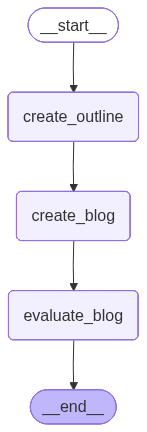

In [127]:
graph.compile()

In [128]:
intial_state = {'title': 'Rise of AI in India'}

final_state = workflow.invoke(intial_state)

print(final_state['title'])

Rise of AI in India


In [129]:
print(final_state['outline'])

<think>
Okay, the user wants me to generate a detailed outline for a blog on the rise of AI in India. Let me start by understanding the scope. The topic is broad, so I need to break it down into manageable sections. 

First, the introduction should set the stage. Maybe start with a brief overview of how AI is growing globally and then narrow down to India. I should mention the significance of AI in the Indian context, like economic growth or technological innovation. Also, the structure of the blog needs to be clear here.

Next, the historical context. When did AI start in India? I remember that in the early 2000s, there were some research initiatives. The National Knowledge Commission in 2009 might have been a key point. Then, the National Strategy for AI in 2018 by NITI Aayog is important. I should note how government policies have evolved over time.

Current state of AI in India would cover different sectors. Let me think about the main areas where AI is making an impact. Healthcare

In [130]:
print(final_state['content'])

<think>
Okay, I need to write a detailed blog on the rise of AI in India following the given outline. Let me start by understanding each section and what needs to be included. The user provided a comprehensive outline with sections like Introduction, Historical Context, Current State, Challenges, Case Studies, Future Outlook, and Conclusion. 

First, the **Introduction** should set the stage by briefly mentioning AI's global impact and then narrow down to India. I need to highlight India's position in AI innovation, maybe mention its tech talent pool and government support. The purpose of the blog is clear: explore historical context, current state, challenges, and future potential.

Moving to the **Historical Context**, I should start with early research initiatives in the 80s-2000s. Mention institutions like IITs and IISc. Then, note the government's role, starting with the National Knowledge Commission in 2009 and the National Strategy for AI in 2018 by NITI Aayog. It's important to

In [131]:
print(final_state['score'])

<think>
Okay, let me start by understanding what the user is asking for. They want a rating out of 100 for the blog based on the outline they provided. The user emphasized that they only want the score without any reasoning, just two lines.

First, I need to assess how well the blog aligns with the original outline. The outline includes sections like Introduction, Historical Context, Current State, Challenges, Case Studies, Future Outlook, and Conclusion. The blog they provided follows this structure closely, covering each section in detail with examples and specific data points. 

Looking at the Historical Context, the blog mentions key years and initiatives like the National Knowledge Commission in 2009 and the National Strategy for AI in 2018. The Current State section breaks down AI applications into various sectors with startups and government projects, which was part of the outline. Challenges are addressed with data privacy, infrastructure gaps, and talent issues. Case studies a